In [1]:
import numpy as np
%matplotlib inline
from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor

In [2]:
# This program plots an event-level variable (MET) based on conditionals with its associated Jet arrays (in this case, where at least 2 have pT > 40)

class Processor(processor.ProcessorABC):
    def __init__(self):
        dataset_axis = hist.Cat("dataset", "")
        MET_axis = hist.Bin("MET_pt", "MET [GeV]", 50, 0, 125)
        
        self._accumulator = processor.dict_accumulator({
            'MET_pt': hist.Hist("Counts", dataset_axis, MET_axis),
            'cutflow': processor.defaultdict_accumulator(int)
        })
    
    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, events):
        output = self.accumulator.identity()
        
        dataset = events.metadata["dataset"]
        
        jets = events.Jet
        MET = events.MET.pt
        
        output['cutflow']['all events'] += jets.size
        
        # We want jets with a pt of at least 40.
        pt_min = (jets.pt > 40)

        # We want MET where the above condition is met for at least two jets. The above is a list of Boolean sublists generated from the jet sublists (True if condition met, False if not). If we sum each sublist, we get the amount of jets matching the condition (since True = 1).
        good_MET = MET[(pt_min.sum() >= 2)]
        output['cutflow']['final events'] += good_MET.size
        
        output['MET_pt'].fill(dataset=dataset, MET_pt=good_MET)
        return output

    def postprocess(self, accumulator):
        return accumulator

In [3]:
fileset = {'SingleMu' : ["root://eospublic.cern.ch//eos/root-eos/benchmark/Run2012B_SingleMu.root"]}

from dask.distributed import Client
from coffea_casa import CoffeaCasaCluster

cluster = CoffeaCasaCluster()
cluster.adapt(minimum=4, maximum=16)
client = Client(cluster)

output = processor.run_uproot_job(fileset=fileset, 
                       treename="Events", 
                       processor_instance=Processor(),
                       executor=processor.dask_executor,
                       executor_args={'client': client, 'nano': True},
                       chunksize=250000)

{'protocol': 'tls://', 'security': Security(require_encryption=True, tls_ca_file='/etc/cmsaf-secrets/ca.pem', tls_client_cert='/etc/cmsaf-secrets/hostcert.pem', tls_client_key='/etc/cmsaf-secrets/hostcert.pem', tls_scheduler_cert='/etc/cmsaf-secrets/hostcert.pem', tls_scheduler_key='/etc/cmsaf-secrets/hostcert.pem', tls_worker_cert='/etc/cmsaf-secrets/hostcert.pem', tls_worker_key='/etc/cmsaf-secrets/hostcert.pem'), 'log_directory': 'logs', 'silence_logs': 'DEBUG', 'scheduler_options': {'port': 8786, 'dashboard_address': '8787', 'protocol': 'tls', 'external_address': 'tls://matousadamec-40gmail-2ecom.dask.coffea.casa:8786'}, 'job_extra': {'universe': 'docker', 'docker_image': 'coffeateam/coffea-casa-analysis:0.2.23', 'container_service_names': 'dask', 'dask_container_port': 8786, 'transfer_input_files': '/etc/cmsaf-secrets/ca.pem, /etc/cmsaf-secrets/hostcert.pem, /etc/cmsaf-secrets/xcache_token', 'encrypt_input_files': '/etc/cmsaf-secrets/ca.pem, /etc/cmsaf-secrets/hostcert.pem, /etc/c

distributed.scheduler - INFO - Clear task state
distributed.scheduler - INFO -   Scheduler at: tls://192.168.145.131:8786
distributed.scheduler - INFO -   dashboard at:                     :8787
distributed.scheduler - INFO - Receive client connection: Client-39e271c7-f2c4-11ea-8e26-ae5d2030f5f0
distributed.core - INFO - Starting established connection


[                                        ] | 0% Completed |  2min 53.2s

distributed.scheduler - INFO - Register worker <Worker 'tls://129.93.182.78:32768', name: htcondor--7504822.0--, memory: 0, processing: 1>
distributed.scheduler - INFO - Starting worker compute stream, tls://129.93.182.78:32768
distributed.core - INFO - Starting established connection


[###                                     ] | 9% Completed | 35.1sin  4.0s

distributed.scheduler - INFO - Register worker <Worker 'tls://129.93.182.206:32779', name: htcondor--7504825.0--, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tls://129.93.182.206:32779
distributed.core - INFO - Starting established connection


[###                                     ] | 9% Completed | 36.3s

distributed.scheduler - INFO - Register worker <Worker 'tls://129.93.182.78:32769', name: htcondor--7504823.0--, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tls://129.93.182.78:32769
distributed.core - INFO - Starting established connection


[###                                     ] | 9% Completed | 36.6s

distributed.scheduler - INFO - Register worker <Worker 'tls://129.93.182.3:32852', name: htcondor--7504824.0--, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tls://129.93.182.3:32852
distributed.core - INFO - Starting established connection


[#####################################   ] | 93% Completed |  1min 48.9s

distributed.scheduler - INFO - Retire worker names ('htcondor--7504822.0--',)
distributed.scheduler - INFO - Retire workers {<Worker 'tls://129.93.182.78:32768', name: htcondor--7504822.0--, memory: 7, processing: 3>}
distributed.scheduler - INFO - Moving 6 keys to other workers


[######################################  ] | 95% Completed |  1min 51.9s

distributed.scheduler - INFO - Remove worker <Worker 'tls://129.93.182.78:32768', name: htcondor--7504822.0--, memory: 10, processing: 0>
distributed.core - INFO - Removing comms to tls://129.93.182.78:32768
distributed.scheduler - INFO - Retire worker names ('htcondor--7504824.0--',)
distributed.scheduler - INFO - Retire workers {<Worker 'tls://129.93.182.3:32852', name: htcondor--7504824.0--, memory: 5, processing: 3>}
distributed.scheduler - INFO - Moving 4 keys to other workers


[######################################  ] | 95% Completed |  1min 52.0s

distributed.scheduler - INFO - Remove worker <Worker 'tls://129.93.182.3:32852', name: htcondor--7504824.0--, memory: 5, processing: 3>
distributed.core - INFO - Removing comms to tls://129.93.182.3:32852


[######################################  ] | 96% Completed |  1min 55.9s

distributed.scheduler - INFO - Retire worker names ('htcondor--7504825.0--',)
distributed.scheduler - INFO - Retire workers {<Worker 'tls://129.93.182.206:32779', name: htcondor--7504825.0--, memory: 45, processing: 0>}
distributed.scheduler - INFO - Moving 44 keys to other workers
distributed.scheduler - INFO - Remove worker <Worker 'tls://129.93.182.206:32779', name: htcondor--7504825.0--, memory: 45, processing: 0>
distributed.core - INFO - Removing comms to tls://129.93.182.206:32779


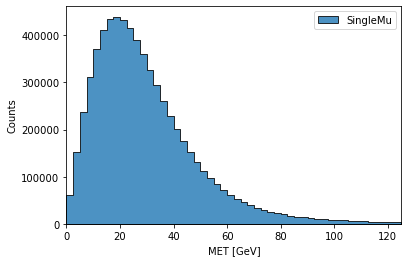

In [4]:
hist.plot1d(output['MET_pt'], overlay='dataset', fill_opts={'edgecolor': (0,0,0,0.3), 'alpha': 0.8})

In [5]:
for key, value in output['cutflow'].items():
    print(key, value)

all events 53446198
final events 6665702
